# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import math
import itertools

# Data Processing

In [2]:
def load_sheet(path:str, sheet_name: str):
    return pd.read_excel(path, sheet_name=sheet_name, skiprows=range(20), skipfooter=2)

In [3]:
df_canada = load_sheet('../data/raw/Canada.xlsx', 'Canada by Citizenship')
df_canada.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [4]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

/var/folders/xt/8sxc97b127n0yx4s5xdv5wch0000gn/T/ipykernel_29025/4155380707.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


In [5]:
df_canada.set_index('Country', inplace=True)
df_canada.columns = list(map(str, df_canada.columns))

In [6]:
years = list(map(str, range(1980, 2014)))

# Data Visualization

In [7]:
%matplotlib inline 

In [8]:
mpl.style.use(['ggplot'])

In [9]:
pio.renderers.default = "png"

## Single Line Plots

How was the immigration from Haiti to Canada from 1980 to 2013? 

In [10]:
haiti = df_canada.loc['Haiti', years]
haiti.index = haiti.index.map(int)  # Change the index values of Haiti to type integer for plotting

### Matplotlib

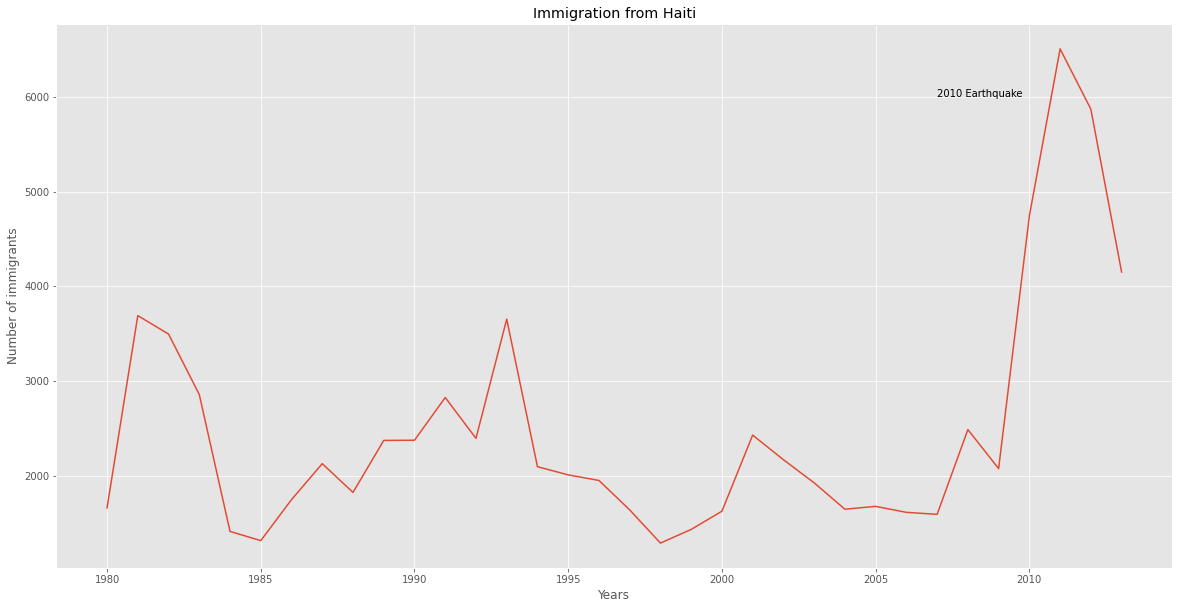

In [11]:
ax = haiti.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Seaborn

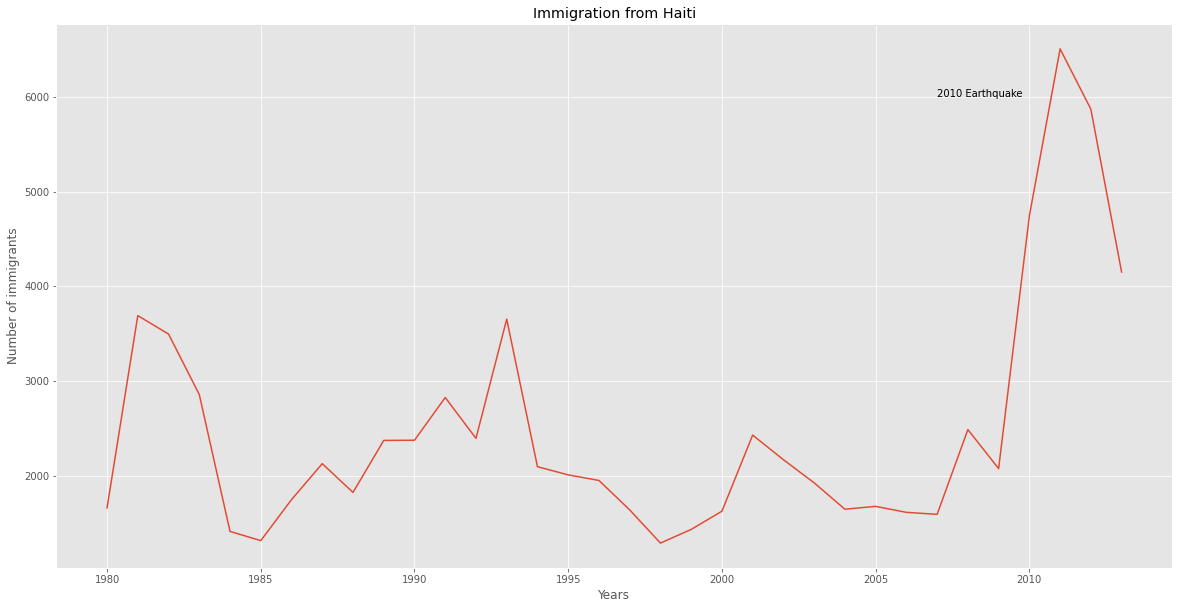

In [12]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=haiti)
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Plotly

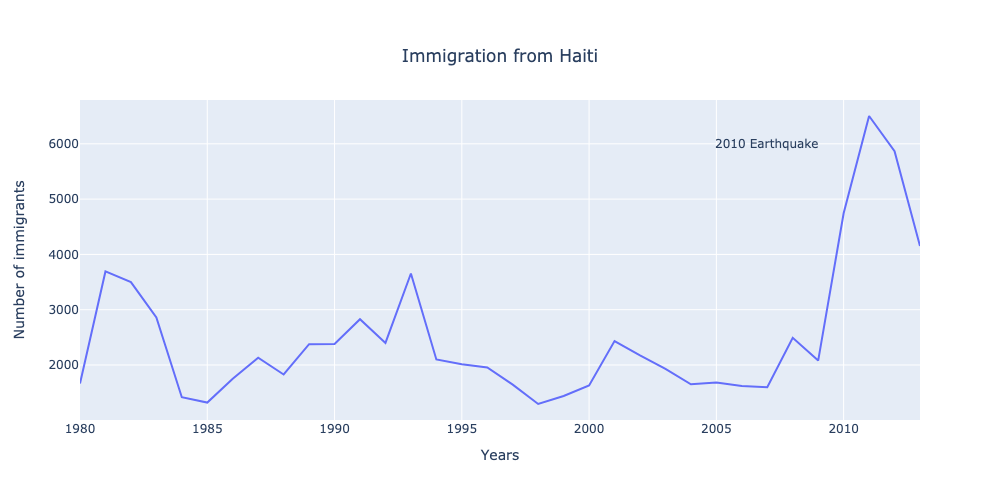

In [13]:
fig = px.line(haiti, 
              title='Immigration from Haiti', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
fig = fig.update_layout(showlegend=False, 
                        title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})  # Center title
annotation = {'x': 2007, 'y': 6000, 'text': '2010 Earthquake', 'showarrow': False} # Annotate plot with the 2010 earthquake 
fig.add_annotation(annotation)
fig.show()

## Multiple Line Plots

Which countries contributed the most to immigration to Canada?

In [14]:
df_canada.sort_values(by='Total', ascending = False, axis = 0, inplace = True)
df_top5 = df_canada.head(5)
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_top5.index = df_top5.index.map(int)

### Matplotlib

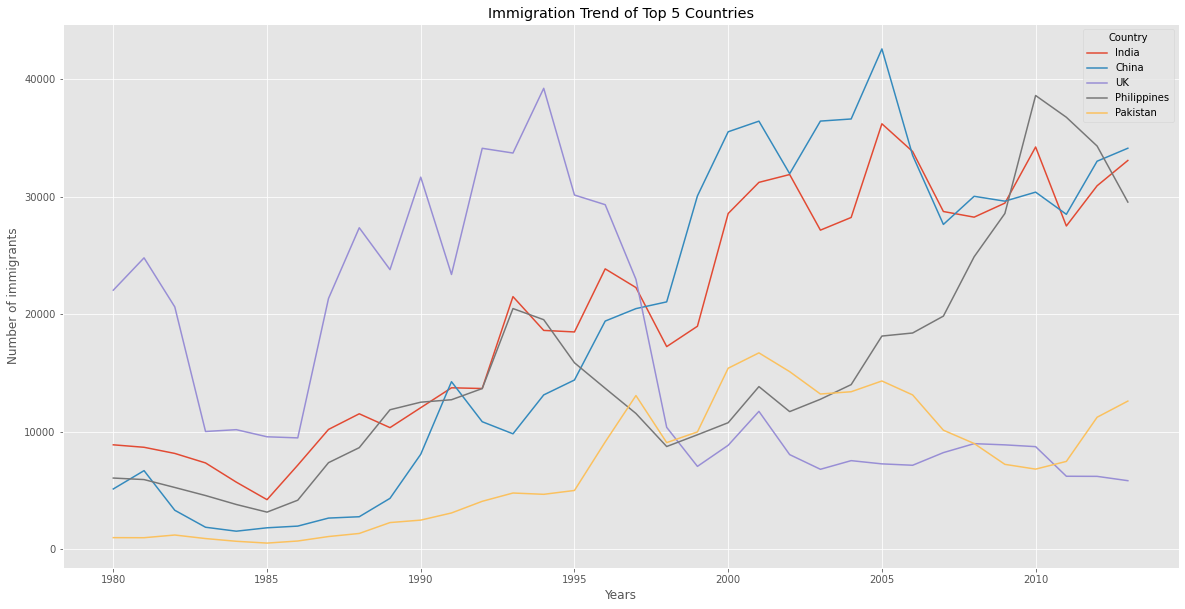

In [15]:
ax = df_top5.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

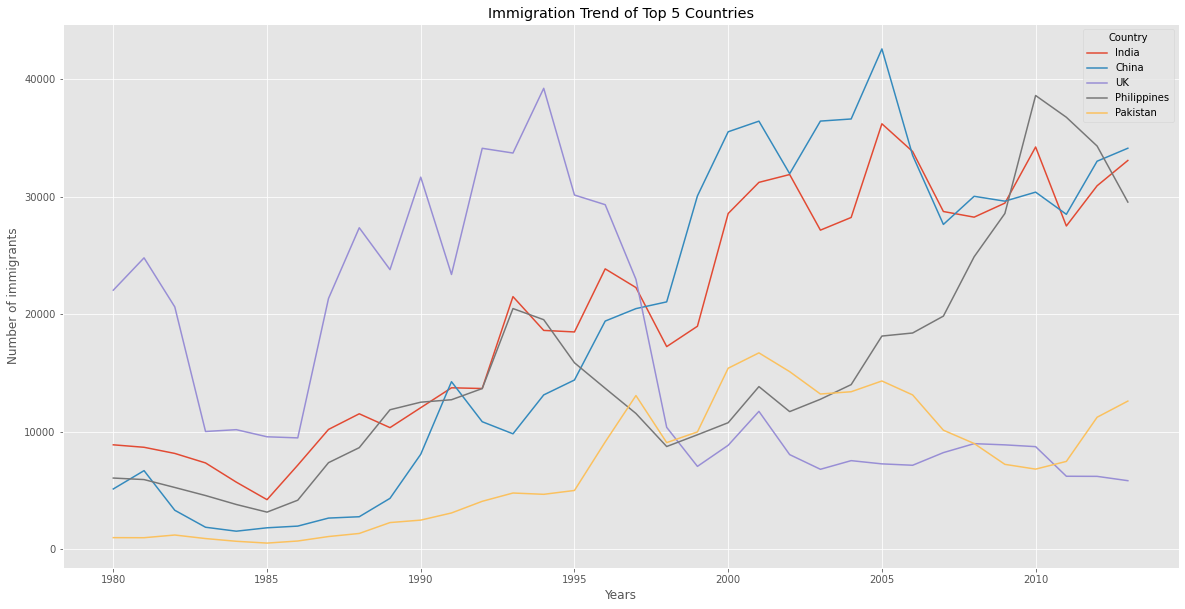

In [16]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_top5, dashes=False)
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Plotly

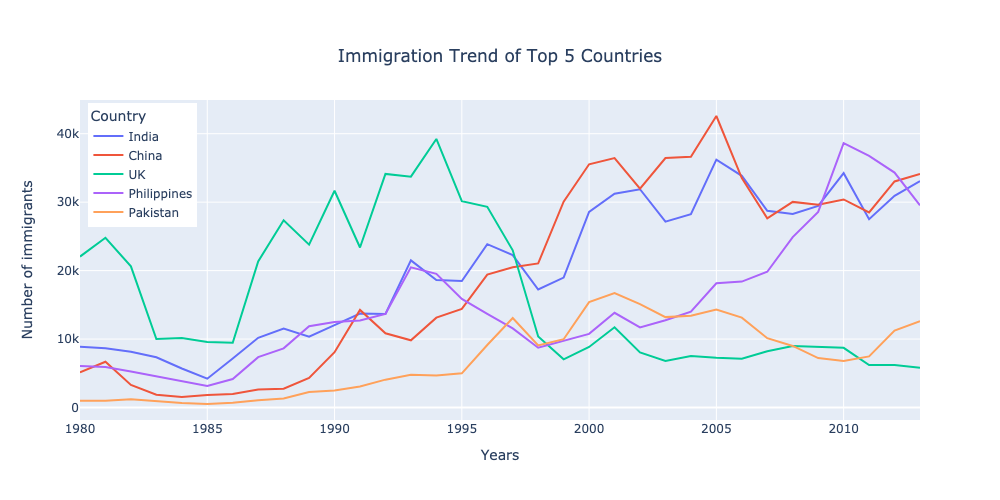

In [17]:
fig = px.line(df_top5, 
              title='Immigration Trend of Top 5 Countries', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
# Center title and move legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

## Area Plots

### Matplotlib

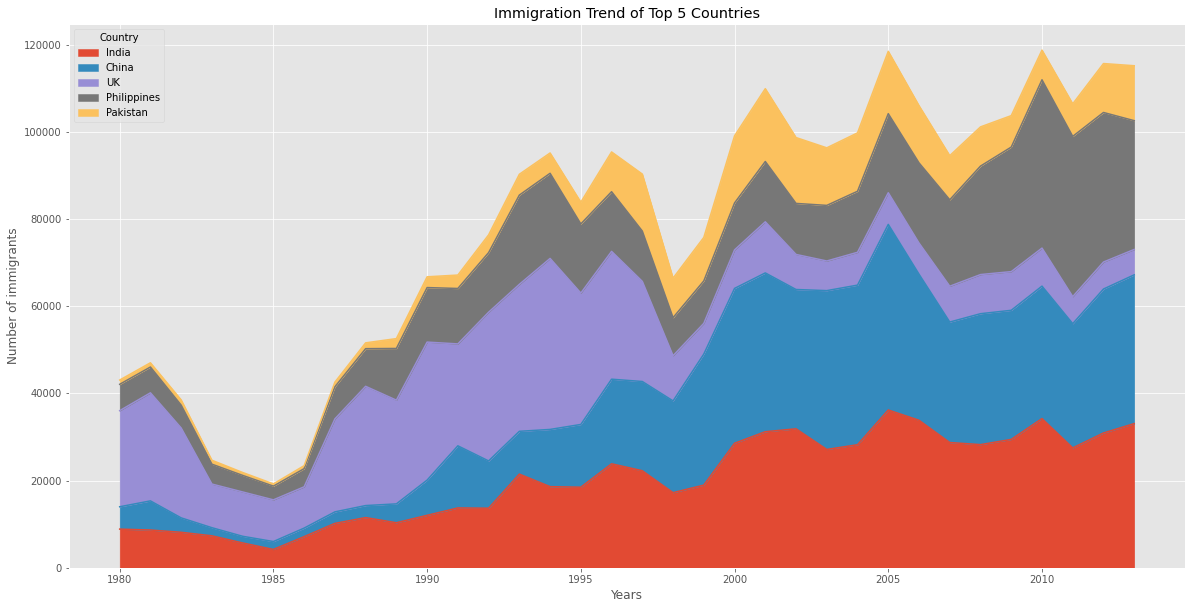

In [18]:
ax = df_top5.plot(kind = 'area', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

Not available

### Plotly

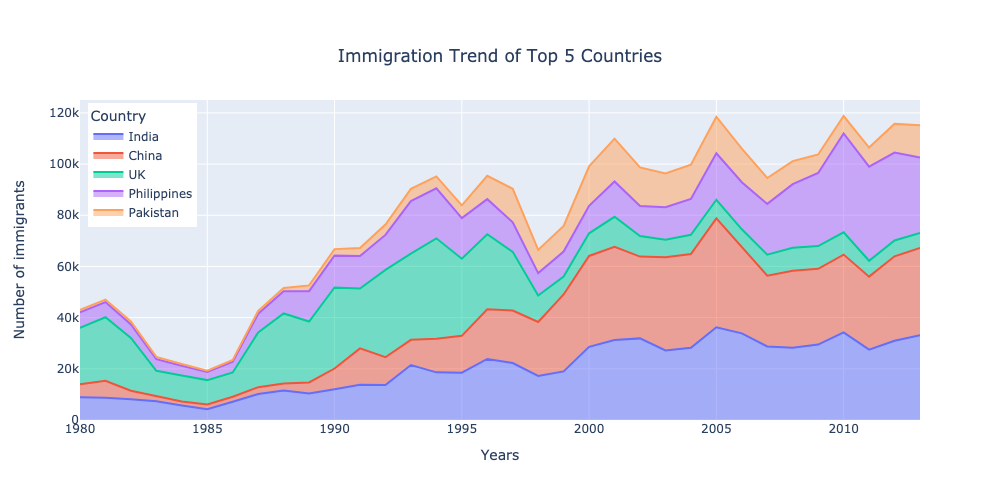

In [19]:
fig = px.area(df_top5, 
              title='Immigration Trend of Top 5 Countries', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
# Center Title and Move Legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

## Single Histograms

What is the number of new immigrants from the various countries to Canada in 2013?

In [20]:
bin_counts, bin_edges = np.histogram(df_canada['2013'])

### Matplotlib

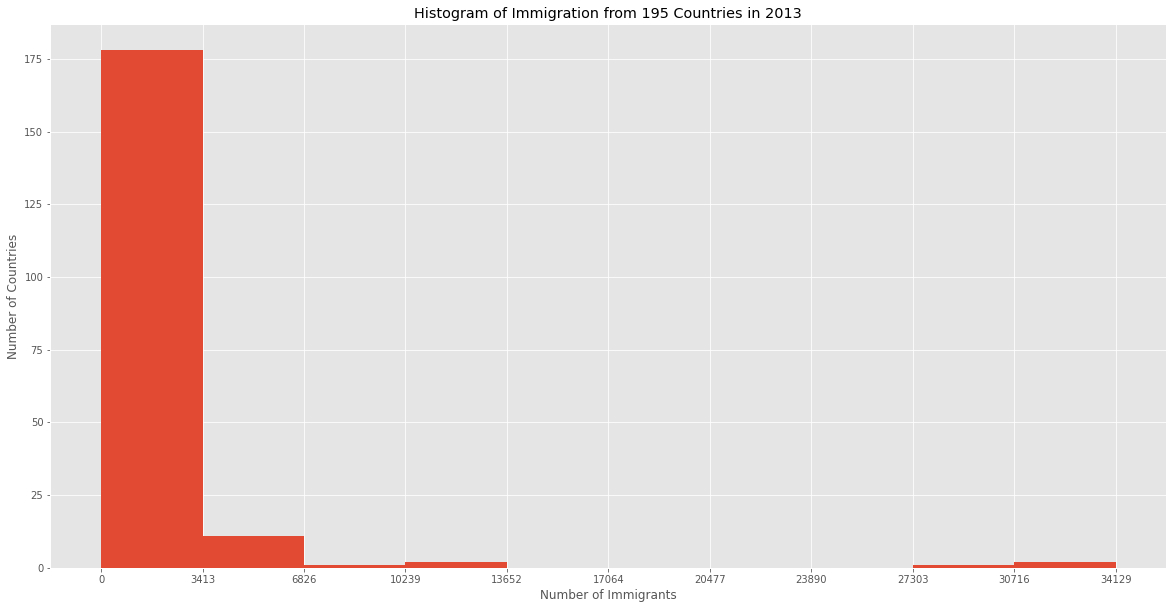

In [21]:
ax = df_canada['2013'].plot(kind='hist', figsize=(20,10), xticks=bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', 
       ylabel='Number of Countries', 
       xlabel='Number of Immigrants');

### Seaborn

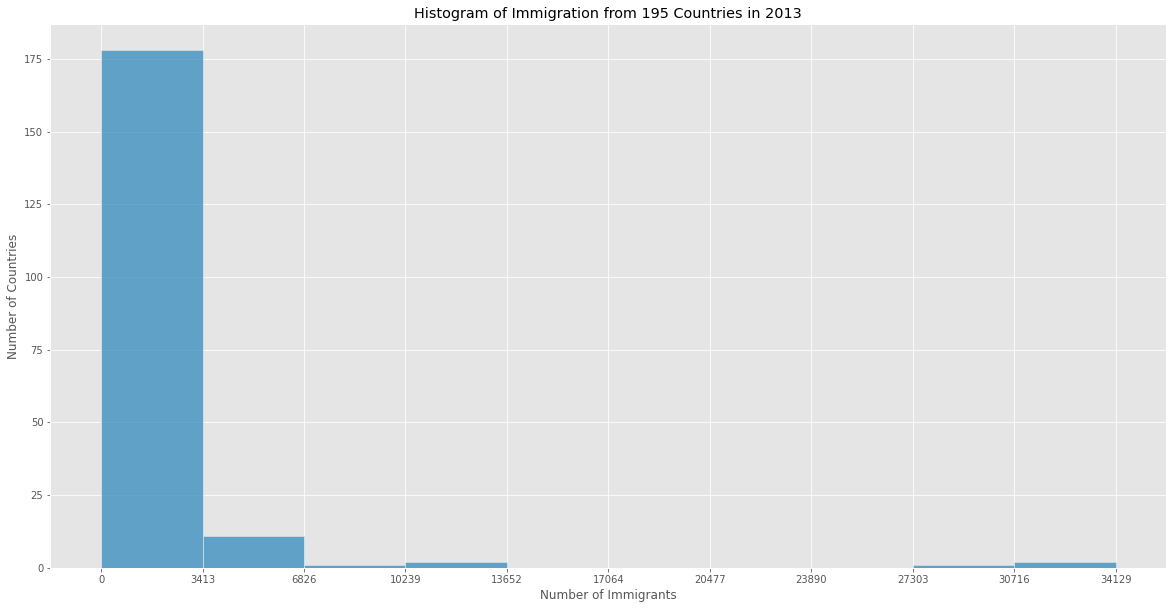

In [22]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_canada['2013'], bins=bin_edges)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from 195 Countries in 2013', 
       ylabel='Number of Countries', 
       xlabel='Number of Immigrants');

### Plotly

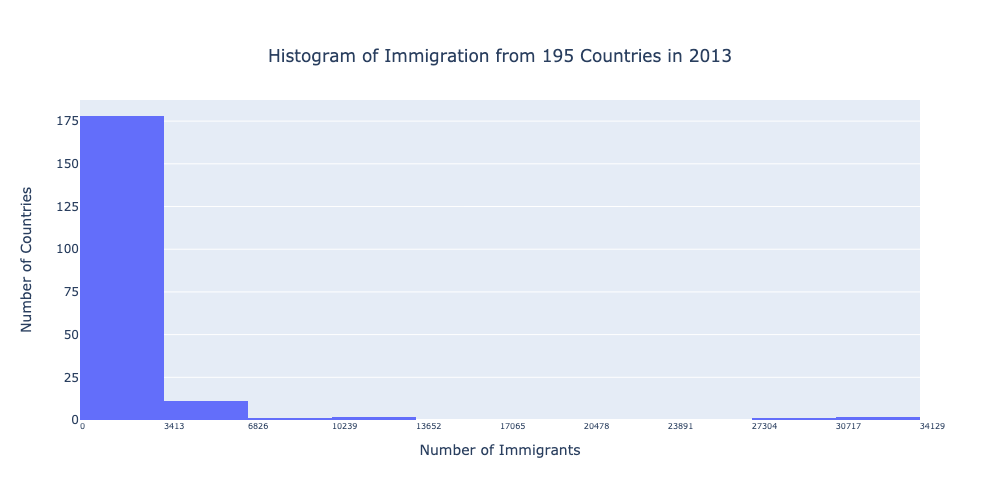

In [23]:
fig = go.Figure(go.Histogram(x=df_canada['2013'], xbins=dict(start=0, end=bin_edges[-1]+1, size=bin_edges[1]+1)))
fig.update_layout(title_text='Histogram of Immigration from 195 Countries in 2013', 
                  xaxis_title_text='Number of Immigrants',
                  yaxis_title_text='Number of Countries', 
                  title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  width=1000, 
                  height=500)
fig.update_xaxes(tickangle=0, 
                 tickmode = 'array',
                 tickvals = bin_edges, 
                 ticktext= [math.ceil(tick) for tick in bin_edges], 
                 ticklabelposition="outside right",
                 tickfont_size=8)
fig.update_yaxes(tickvals=np.arange(0,200,25))
fig.show()

## Multiple Histograms

 What is the immigration distribution for Denmark, Norway, and Sweden from 1980 to 2013?

In [24]:
df_t = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
bin_counts, bin_edges = np.histogram(df_t, 15)

### Matplotlib

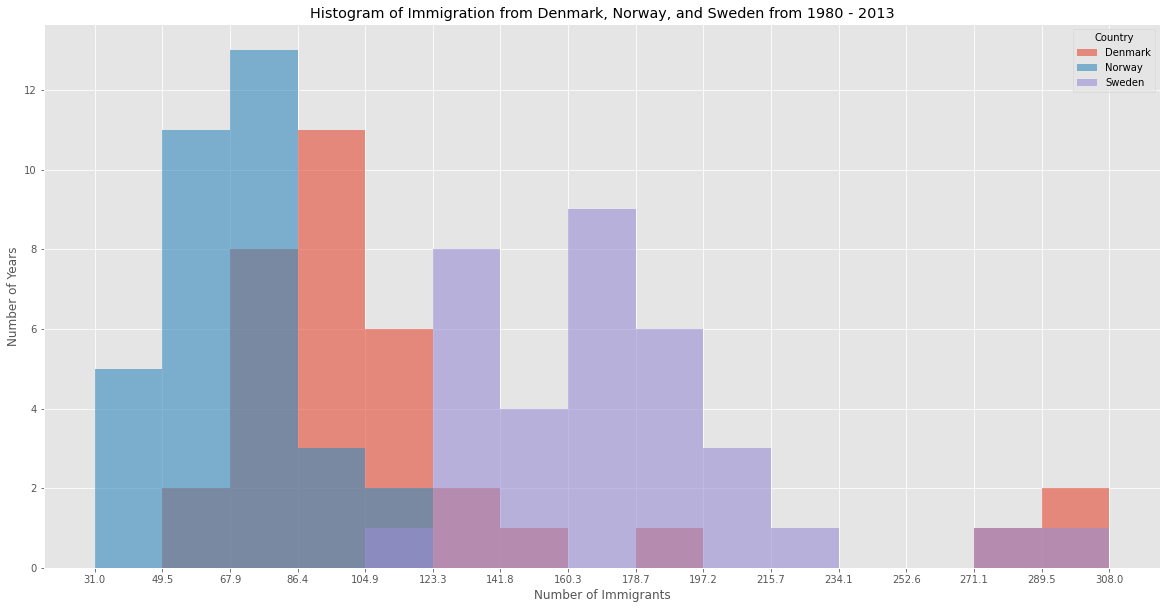

In [25]:
ax = df_t.plot(kind='hist', figsize=(20,10),bins=15, xticks=bin_edges, alpha=0.6)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', 
       ylabel='Number of Years', 
       xlabel='Number of Immigrants');

### Seaborn

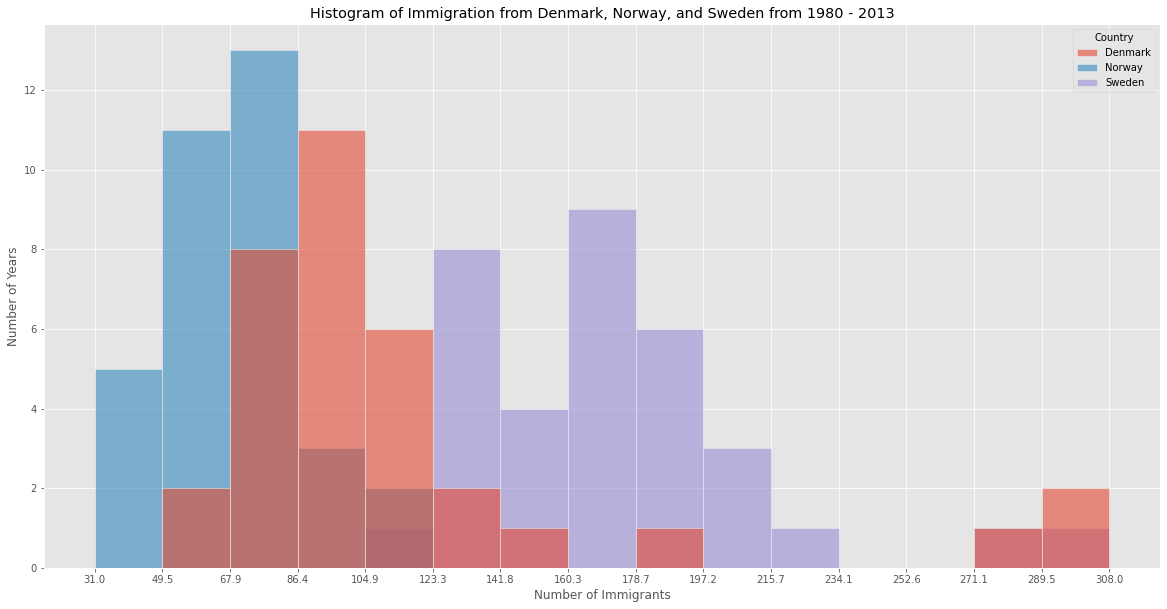

In [26]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_t, bins=bin_edges, alpha=0.6)
plt.xticks(bin_edges)
ax.set(title='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', 
       ylabel='Number of Years', 
       xlabel='Number of Immigrants');

### Plotly

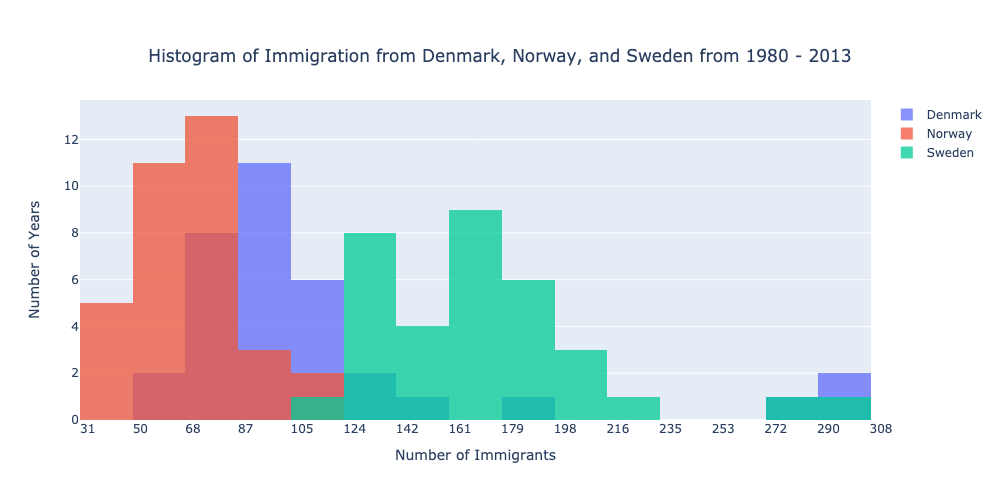

In [27]:
xbins = {'start':31, 'end':330, 'size':18.5}
opacity = 0.75
fig = go.Figure(go.Histogram(x=df_t['Denmark'], name='Denmark', xbins=xbins, opacity=opacity))
fig.add_trace(go.Histogram(x=df_t['Norway'], name='Norway', xbins=xbins,opacity=opacity))
fig.add_trace(go.Histogram(x=df_t['Sweden'], name='Sweden', xbins=xbins, opacity=opacity))
fig.update_layout(barmode="overlay", 
                  width=1000, 
                  height=500, 
                  title_text='Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', 
                  xaxis_title_text='Number of Immigrants',
                  yaxis_title_text='Number of Years', 
                  title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(tickmode = 'array', 
                 tickvals =bin_edges, 
                 ticktext= [math.ceil(tick) for tick in bin_edges], 
                 ticklabelposition="outside right",
                 tickfont_size=12)
fig.show()

## Vertical Bar Plots

What is the number of Icelandic immigrants to Canada from 1980 to 2013?

In [28]:
df_iceland = df_canada.loc['Iceland', years]

### Matplotlib

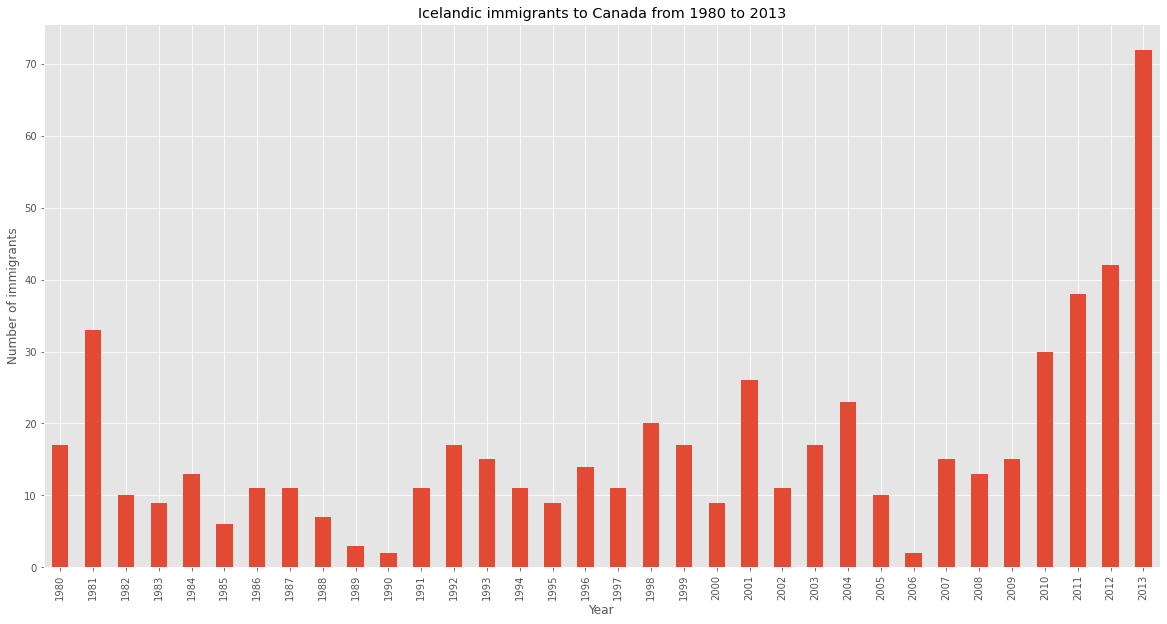

In [29]:
ax = df_iceland.plot(kind='bar', figsize=(20, 10))
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');

### Seaborn

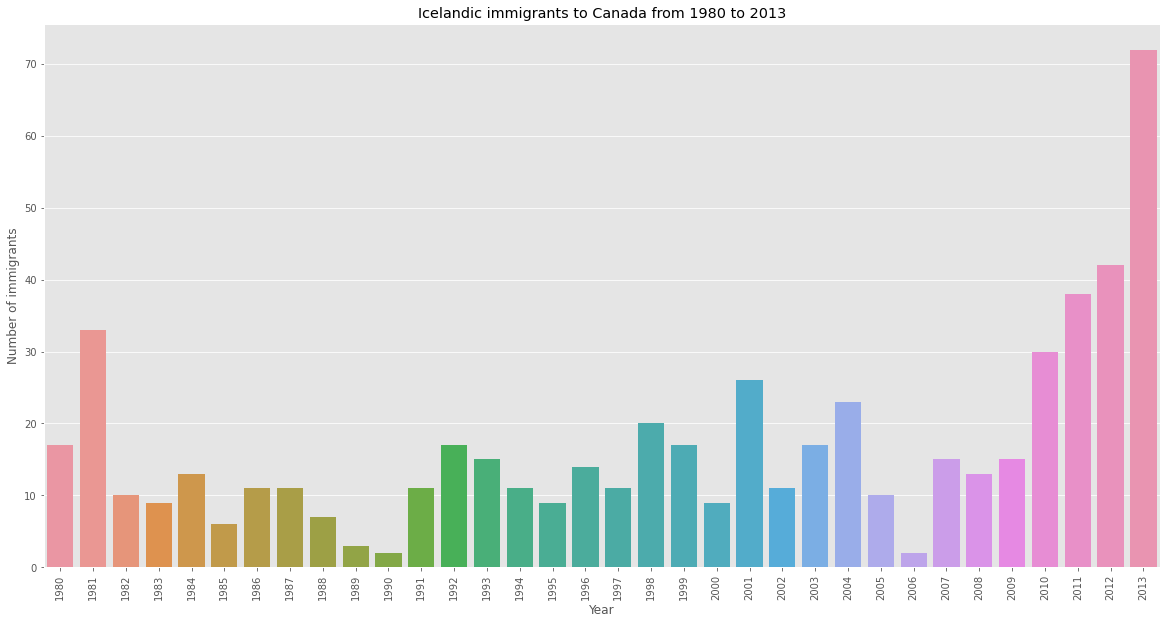

In [30]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df_iceland.index, y=df_iceland.values)
ax.set(title='Icelandic immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year')
plt.xticks(rotation=90);

### Plotly

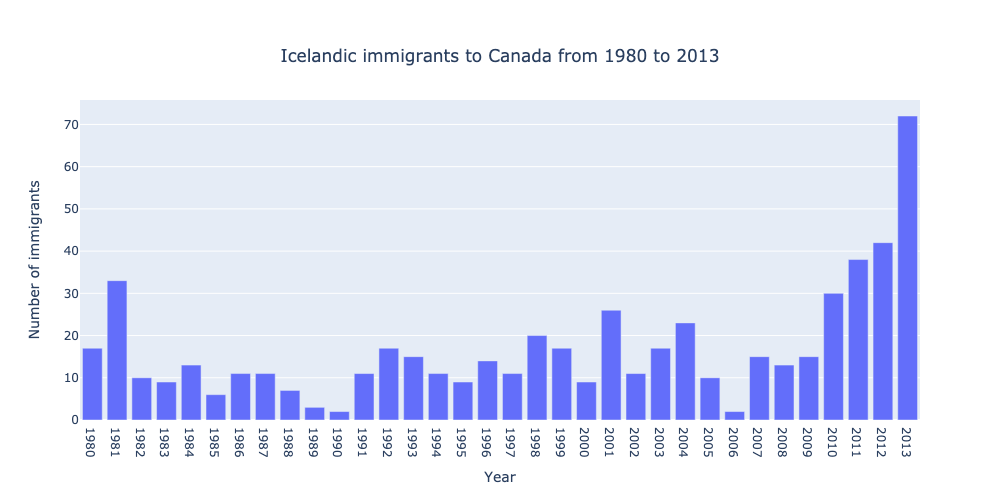

In [31]:
iceland = pd.DataFrame({'Year': df_iceland.index, 'Number of immigrants': df_iceland.values})
fig = px.bar(iceland, 
             x='Year', 
             y='Number of immigrants', 
             width=1000, 
             height=500, 
             title='Icelandic immigrants to Canada from 1980 to 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

## Horizontal Bar Plots

What is the total number of immigrants to Canada from the top 15 countries, from 1980 to 2013?

In [32]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)

### Matplotlib

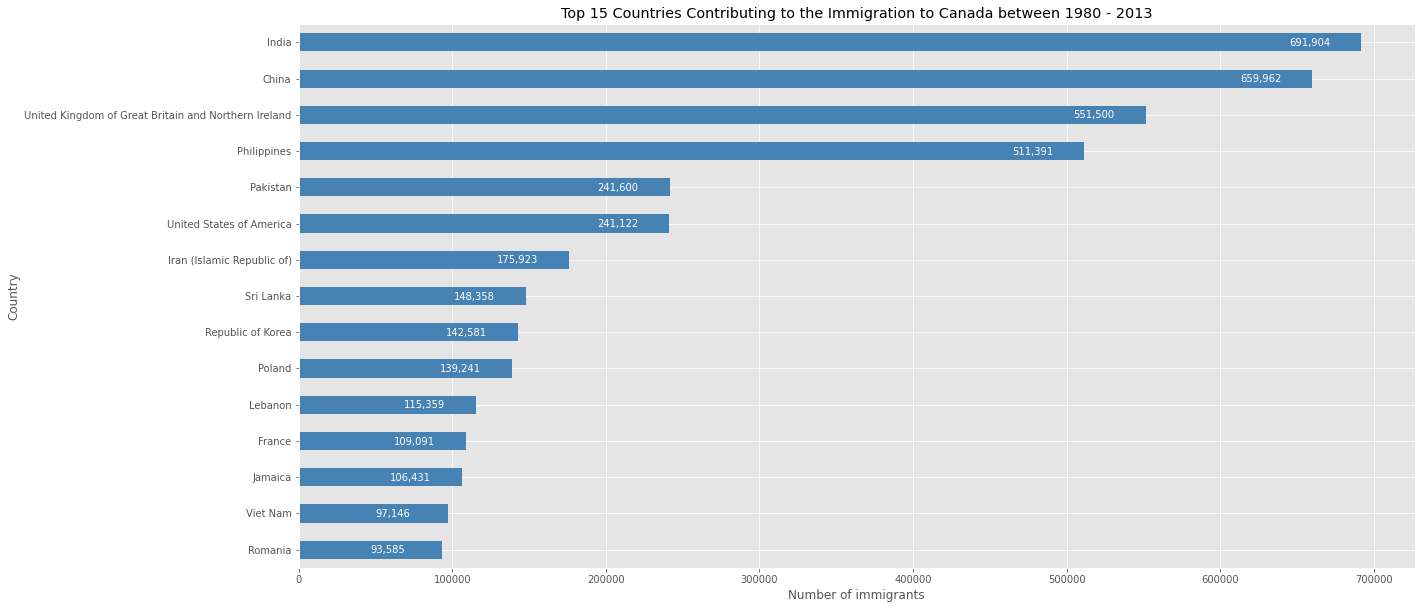

In [33]:
ax = df_top15.plot(kind='barh', figsize=(20, 10), color='steelblue')
ax.set(title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013', 
       xlabel='Number of immigrants');
# Annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    # Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 

### Seaborn

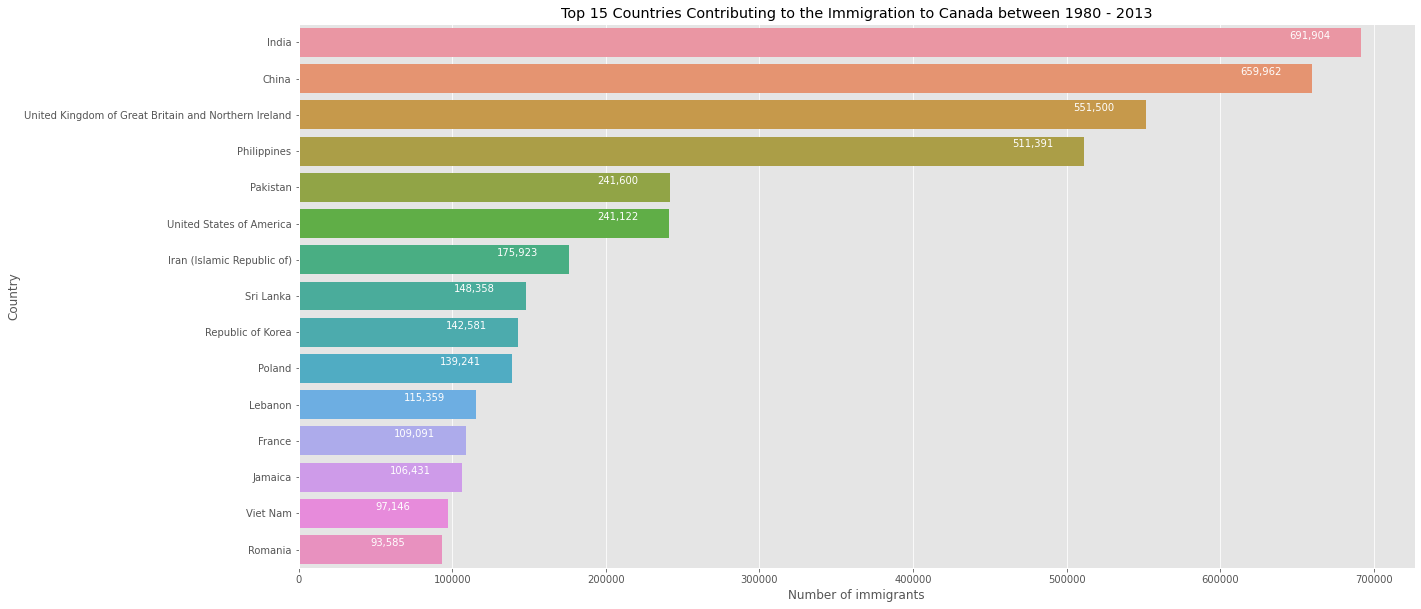

In [34]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=df_top15.index, x=df_top15.values, orient='h', order=df_top15.index[::-1])
ax.set(title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013', 
       xlabel='Number of immigrants');
# Annotate value labels to each country
for index, value in enumerate(df_top15[::-1]): 
    label = format(int(value), ',')
    # Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 

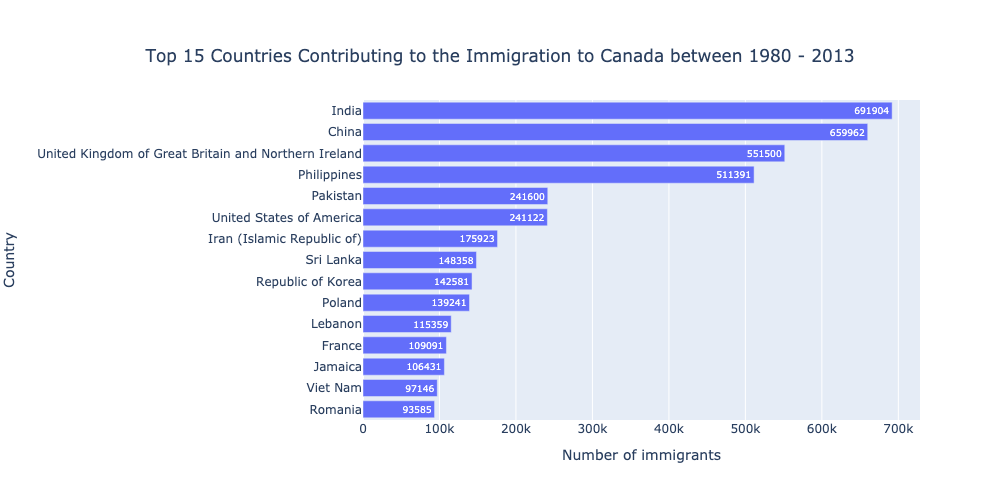

In [35]:
df_top15.sort_values(ascending=False, inplace=True)
fig = px.bar(df_top15, 
             y=df_top15.index, 
             x=df_top15.values, 
             text = df_top15.values, 
             width=1000, 
             height=500, 
             orientation='h', 
             category_orders={'Country': df_top15.index}, 
             title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        xaxis_title_text="Number of immigrants")
fig.show()

## Pie Charts

What is the percentage of new immigrants grouped by continents from 1980 to 2013?

In [36]:
df_continents = df_canada.groupby('Continent', axis=0).sum()

### Matplotlib

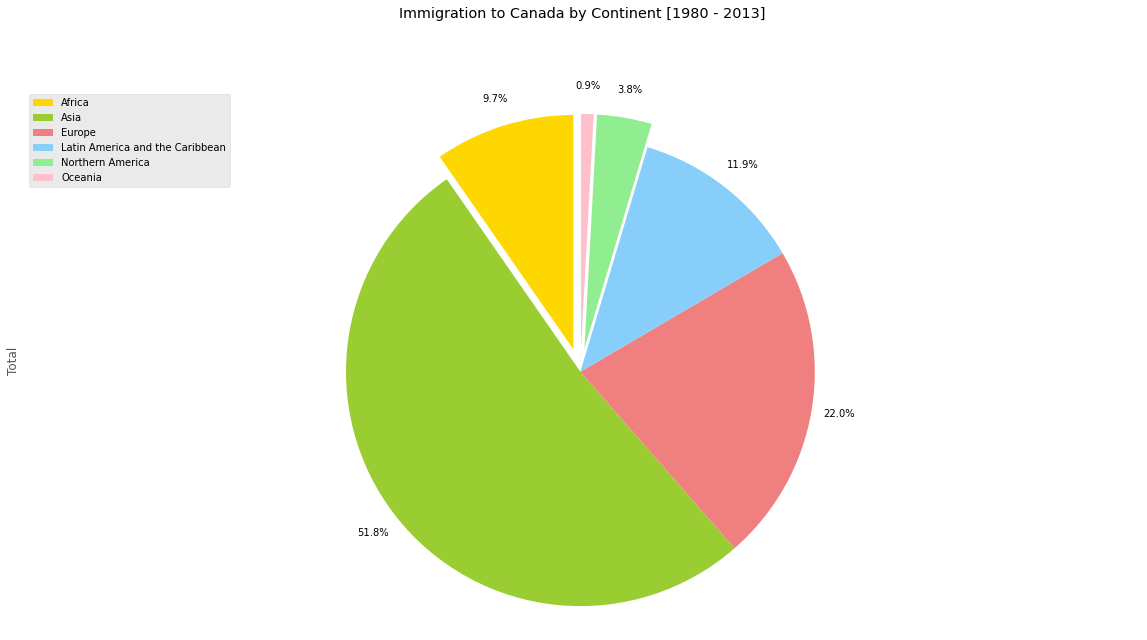

In [37]:
fig = plt.figure()
fig.patch.set_facecolor('white')  # Change background color
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie', 
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list)
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left');

### Seaborn

Not available

### Plotly

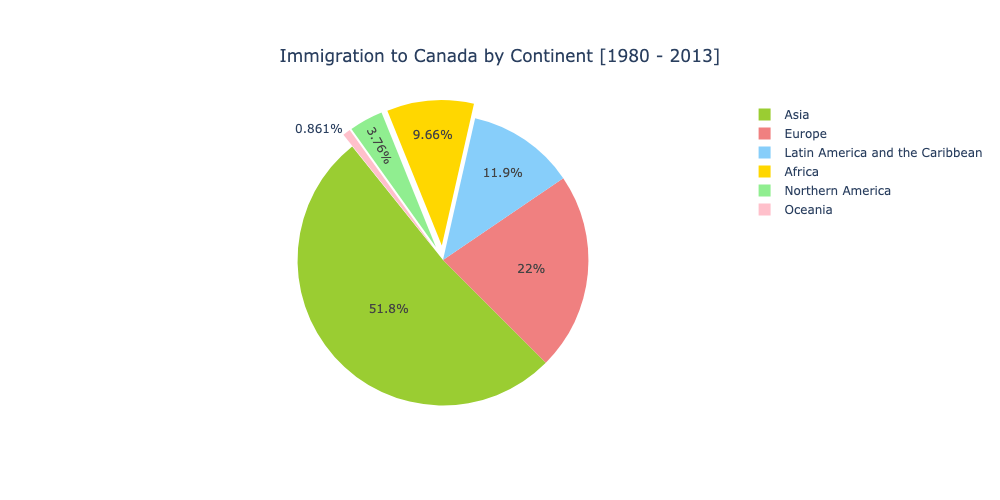

In [38]:
fig = px.pie(df_continents['Total'], 
             values=df_continents['Total'].values, 
             names=df_continents['Total'].index, 
             width=1000, 
             height=500, 
             title='Immigration to Canada by Continent [1980 - 2013]')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_traces(marker=dict(colors=colors_list), rotation=135, pull=[0.1, 0, 0, 0, 0.1, 0.1])
fig.show()

## Box Plots

Compare the distribution of the number of new immigrants from India and China from 1980 to 2013.

In [39]:
df_CI = df_canada.loc[['China','India'], years].transpose()

### Matplotlib

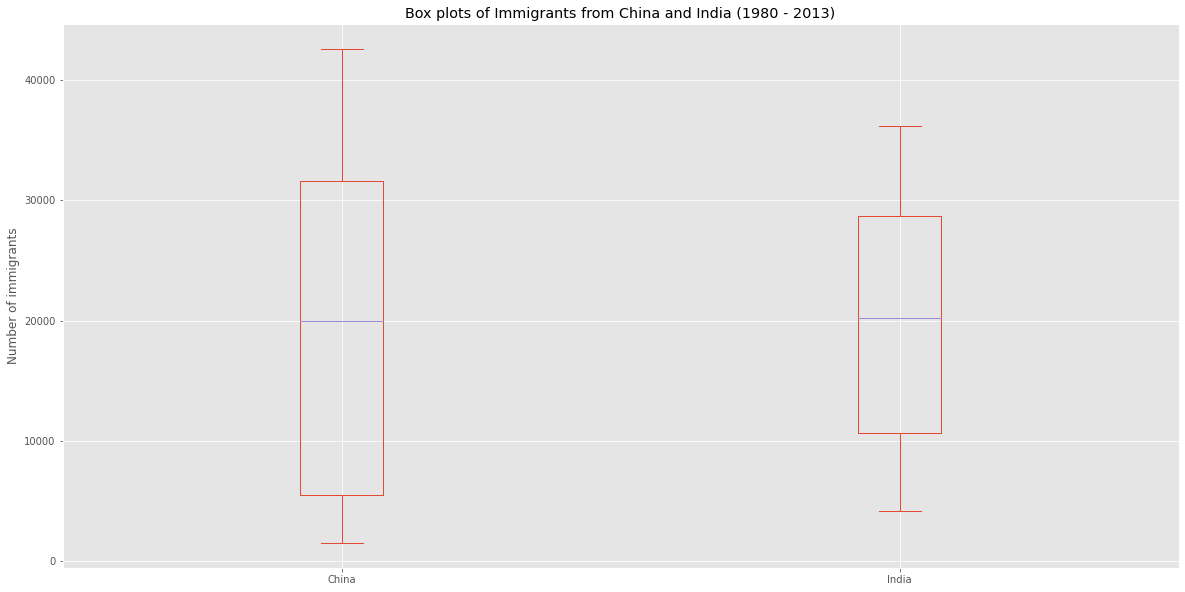

In [40]:
ax = df_CI.plot(kind='box', figsize=(20, 10))
ax.set(title='Box plots of Immigrants from China and India (1980 - 2013)', ylabel='Number of immigrants');

### Seaborn

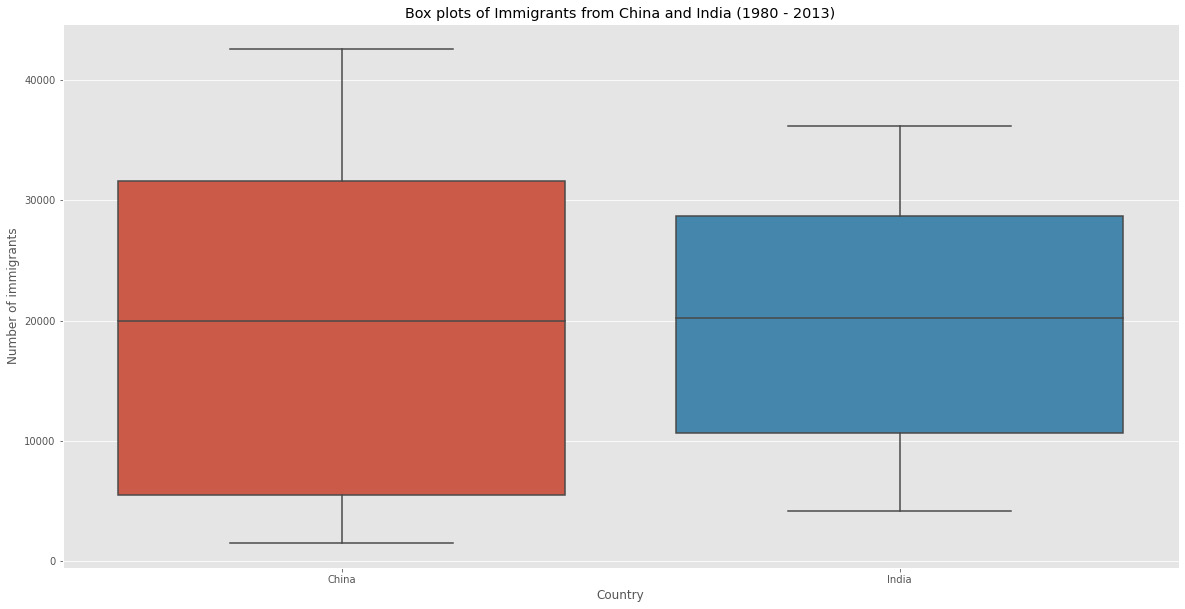

In [41]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_CI)
ax.set(title='Box plots of Immigrants from China and India (1980 - 2013)', ylabel='Number of immigrants');

### Plotly

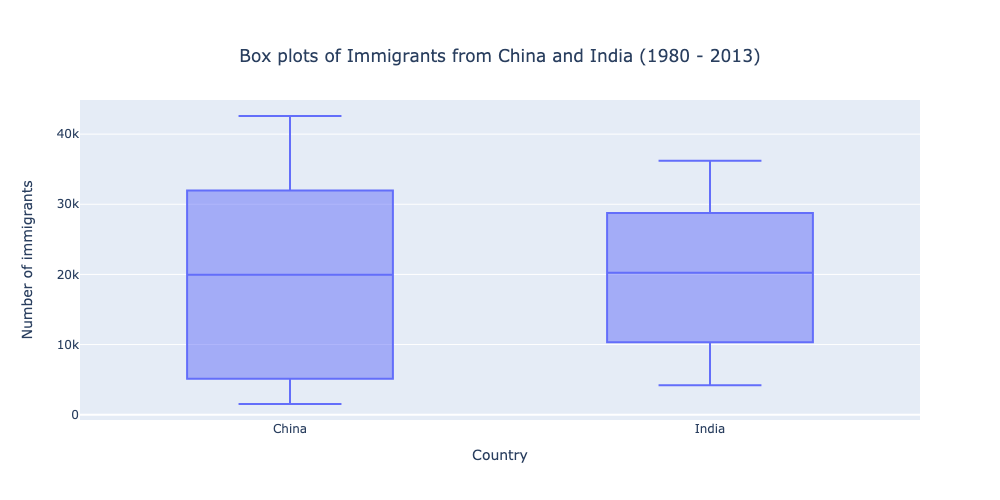

In [42]:
fig = px.box(df_CI, width=1000, height=500, title='Box plots of Immigrants from China and India (1980 - 2013)')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        yaxis_title_text="Number of immigrants")
fig.show()

## Scatter Plots

What is the trend of total immigrantion to Canada from 1980 to 2013?

In [43]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']

### Matplotlib

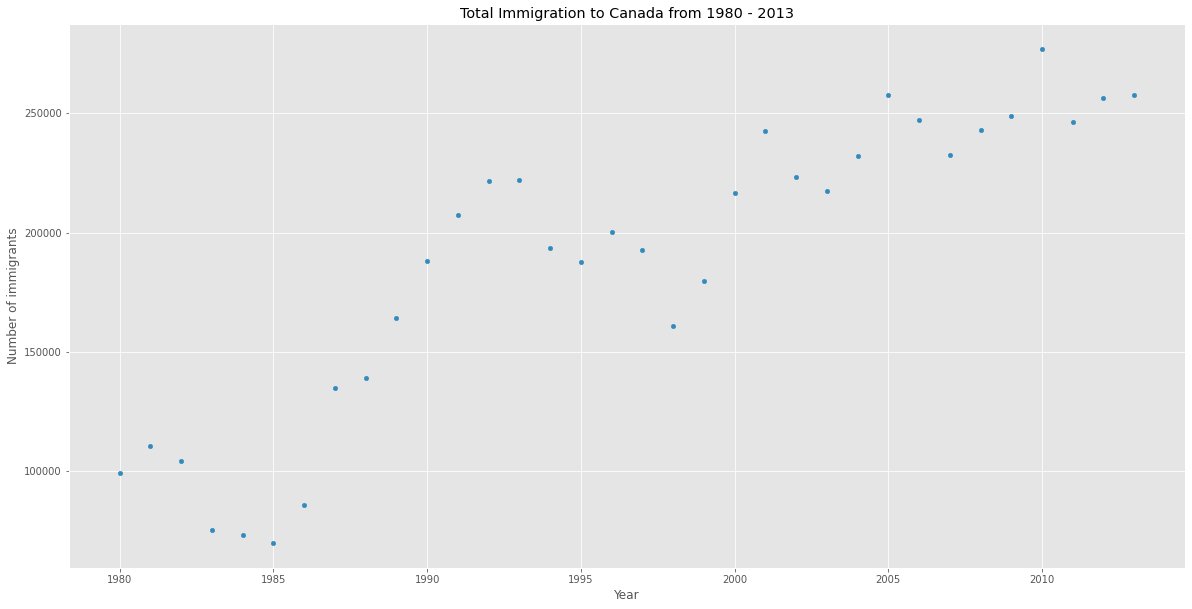

In [44]:
ax = df_total.plot(kind='scatter', x='year', y='total', figsize=(20, 10))
ax.set(title='Total Immigration to Canada from 1980 - 2013', xlabel='Year', ylabel='Number of immigrants');

### Seaborn

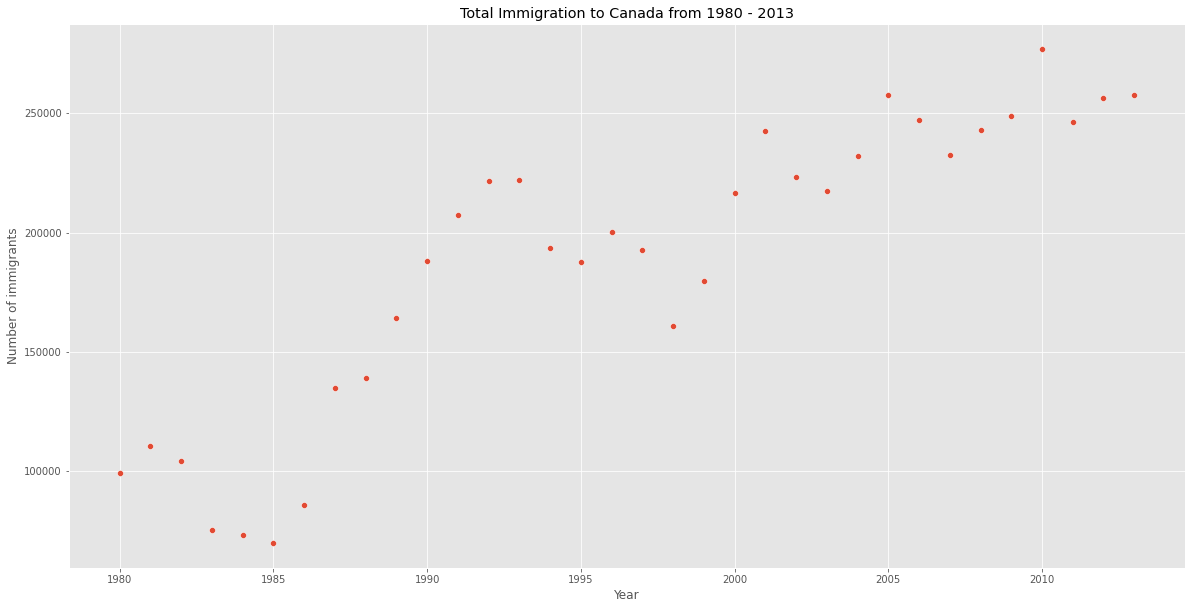

In [45]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_total, x='year', y='total')
ax.set(title='Total Immigration to Canada from 1980 - 2013', xlabel='Year', ylabel='Number of immigrants');

### Plotly

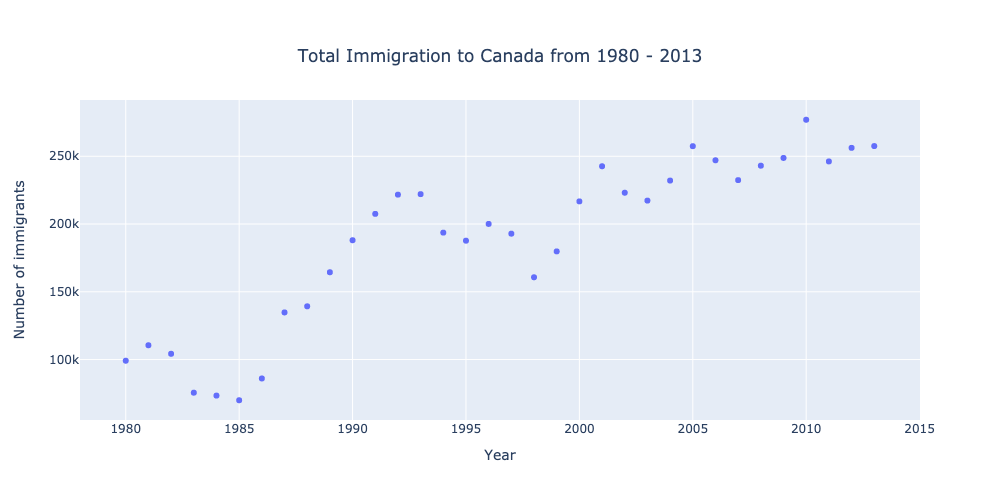

In [46]:
fig = px.scatter(df_total, x='year', y='total', width=1000, height=500, title='Total Immigration to Canada from 1980 - 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        xaxis_title_text="Year",
                        yaxis_title_text="Number of immigrants")
fig.show()

## Bubble Plots

 Compare the immigration from Brazil and Argentina from 1980 to 2013.

In [47]:
df_can_t = df_canada[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

### Matplotlib

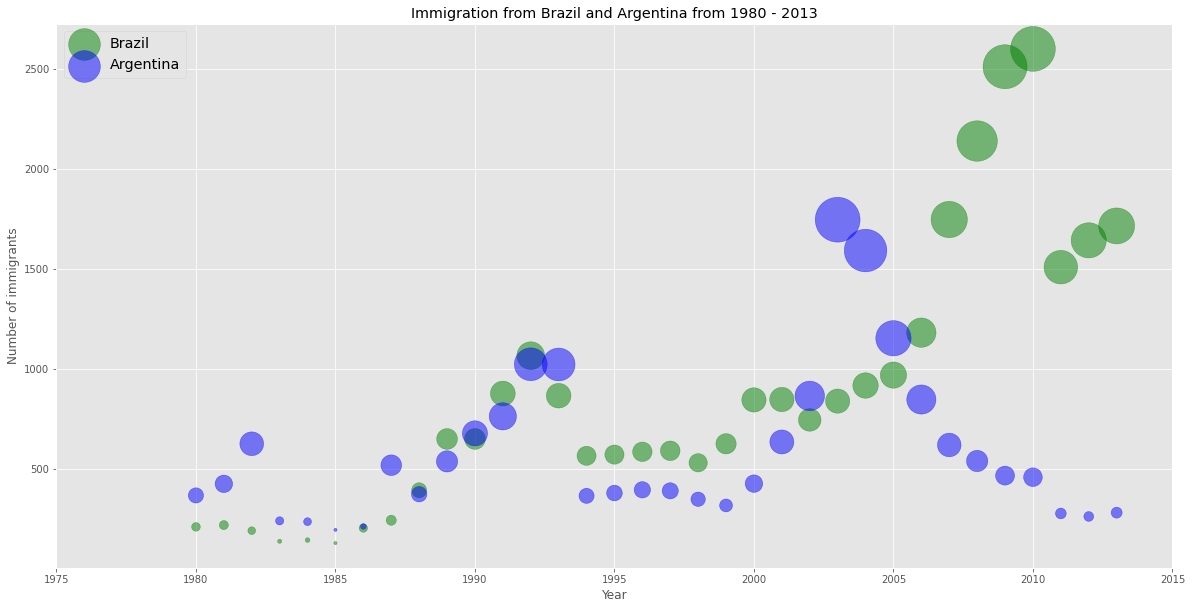

In [48]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(20, 10),
                    alpha=0.5,                 
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )
ax0.set(title='Immigration from Brazil and Argentina from 1980 - 2013', ylabel='Number of immigrants');
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large');

### Seaborn

In [49]:
brazil_values = df_canada.loc['Brazil'].values[3:-1]
argentina_values = df_canada.loc['Argentina'].values[3:-1]
years
df_arg_brz = pd.DataFrame({'Country': ['Brazil']* 34 + ['Argentina']* 34, 
                           'Year': years *2,
                           'Number of immigrants': list(itertools.chain(brazil_values,argentina_values))})

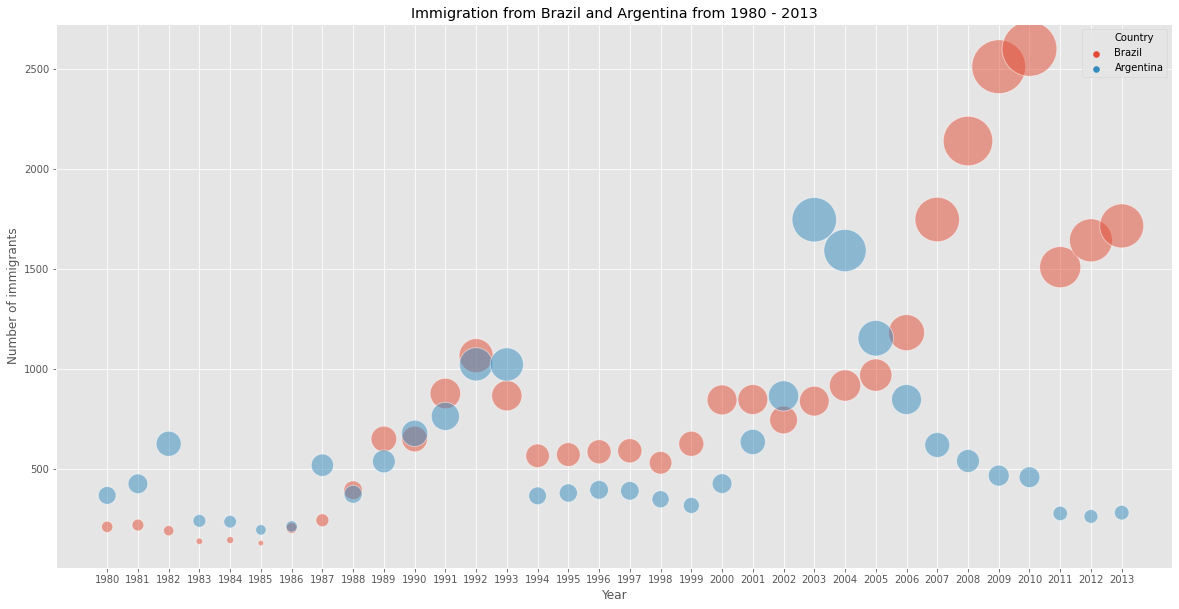

In [50]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_arg_brz, 
                     x="Year", 
                     y="Number of immigrants", 
                     size="Number of immigrants", 
                     hue="Country", 
                     alpha=0.5, 
                     sizes=(30, 3000))
# Remove legend with the sizes of the bubbles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels[:3]);

ax.set(title='Immigration from Brazil and Argentina from 1980 - 2013', xlabel='Year', ylabel='Number of immigrants');

### Plotly

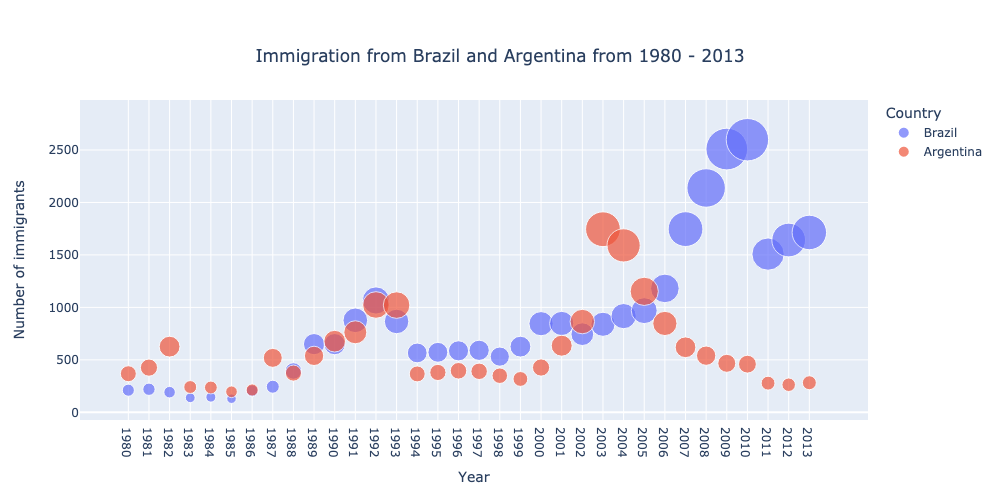

In [51]:
fig = px.scatter(df_arg_brz, 
                 x="Year", 
                 y="Number of immigrants", 
                 size="Number of immigrants", 
                 color="Country", 
                 size_max=30,
                 title='Immigration from Brazil and Argentina from 1980 - 2013',
                 width=1000, 
                 height=500)
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

## Heatmaps

Visualize the total immigration of the top 5 countries grouped by decade, using a heatmap.

In [52]:
df_top5 = df_canada.sort_values(['Total'], ascending=False, axis=0).head(5)
df_80s = df_top5.loc[:, list(map(str, range(1980, 1990))) ].sum(axis=1) 
df_90s = df_top5.loc[:, list(map(str, range(1990, 2000))) ].sum(axis=1) 
df_00s = df_top5.loc[:, list(map(str, range(2000, 2010)))].sum(axis=1)
df_top5_decades = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
df_top5_decades.index = ['India', 'China', 'UK', 'Philippines', 'Pakistan'] # Rename UK

### Matplotlib

In [61]:
# Adapted from: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, cmap, cbarlabel):
    ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, cmap, aspect='auto')
    # Set Matplotlib colorbar size to match graph
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.7)
    # Create colorbar
    cbar = plt.colorbar(im, cax=cax, orientation="horizontal")
    cbar.ax.set_xlabel(cbarlabel, labelpad=10)
    # Set ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    return ax, im, cbar 


def annotate_heatmap(im, data=None, valfmt="{x:d}", textcolors=("black", "white"), threshold=None):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    # Set default alignment to center, but allow it to be overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
    # Loop over the data and create a `Text` for each "pixel". Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    return texts

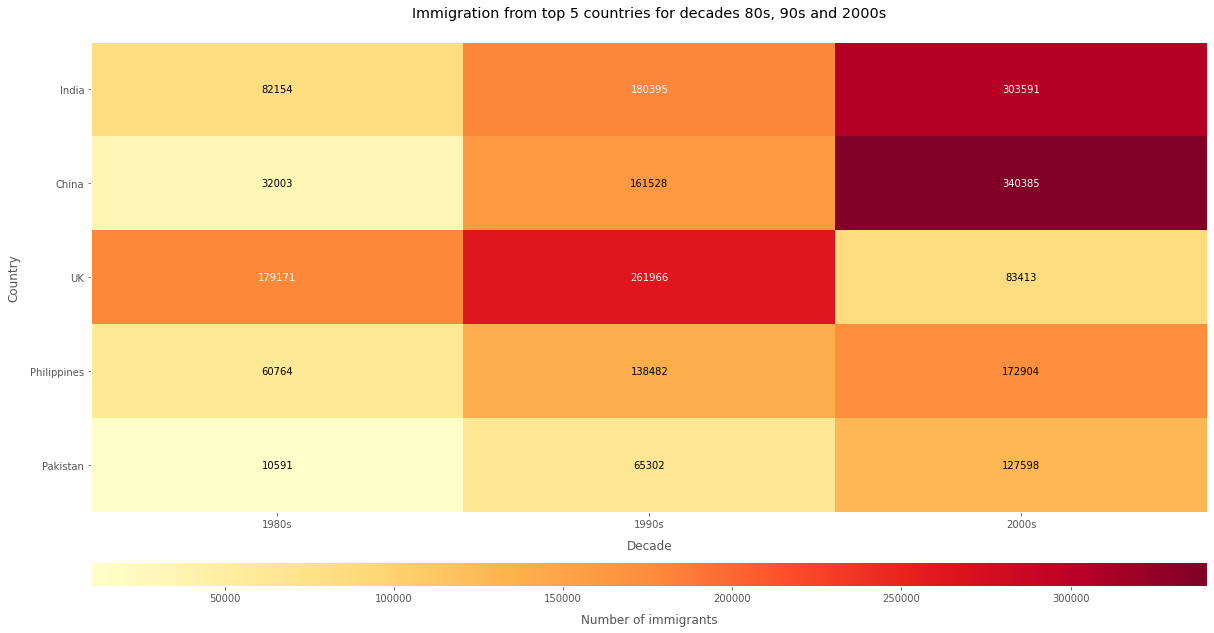

In [63]:
plt.figure(figsize=(20,10))
ax, im, cbar = heatmap(df_top5_decades.values, 
                       df_top5_decades.index,
                       df_top5_decades.columns, 
                       "YlOrRd", 
                       "Number of immigrants")
texts = annotate_heatmap(im)
ax.grid(False)
ax.set_title('Immigration from top 5 countries for decades 80s, 90s and 2000s', pad=25)
ax.set_xlabel('Decade', labelpad=10)
ax.set_ylabel('Country', labelpad=10);